In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


2022-11-14 13:28:13.330590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 13:28:13.721777: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-14 13:28:13.795170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 13:28:13.795203: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [15]:
train_path = 'images_data/train'
valid_path = 'images_data/validation' 
test_path = 'images_data/predict/'

In [4]:
name_of_people = ['amey', 'sandesh', 'vailantan', 'nathan', 'shoydon', 'vedant', 'manasvi', 'srijita']

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(train_path, target_size=(640,480), classes = name_of_people, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(valid_path, target_size=(640,480), 
  classes=name_of_people, batch_size=10)

Found 298 images belonging to 8 classes.
Found 150 images belonging to 8 classes.


In [6]:
imgs, labels = next(train_batches)
print(imgs)

[[[[ 5.9060997e+01  4.8221001e+01  4.1320000e+01]
   [ 6.0060997e+01  4.9221001e+01  4.3320000e+01]
   [ 5.8060997e+01  4.9221001e+01  4.3320000e+01]
   ...
   [ 6.0997009e-02 -9.7789993e+00  2.7320000e+01]
   [-9.3900299e-01 -1.3778999e+01  2.5320000e+01]
   [-1.9390030e+00 -1.4778999e+01  2.4320000e+01]]

  [[ 5.7060997e+01  4.6221001e+01  3.9320000e+01]
   [ 5.9060997e+01  4.8221001e+01  4.2320000e+01]
   [ 5.8060997e+01  4.9221001e+01  4.3320000e+01]
   ...
   [ 6.0997009e-02 -8.7789993e+00  2.5320000e+01]
   [ 1.0609970e+00 -1.0778999e+01  2.6320000e+01]
   [ 6.0997009e-02 -1.1778999e+01  2.5320000e+01]]

  [[ 5.7060997e+01  4.6221001e+01  3.9320000e+01]
   [ 5.9060997e+01  4.8221001e+01  4.2320000e+01]
   [ 5.8060997e+01  4.9221001e+01  4.3320000e+01]
   ...
   [ 6.0997009e-02 -8.7789993e+00  2.5320000e+01]
   [ 1.0609970e+00 -1.0778999e+01  2.6320000e+01]
   [ 6.0997009e-02 -1.1778999e+01  2.5320000e+01]]

  ...

  [[ 5.1060997e+01  3.3221001e+01  2.5320000e+01]
   [ 5.2060997e+

In [7]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

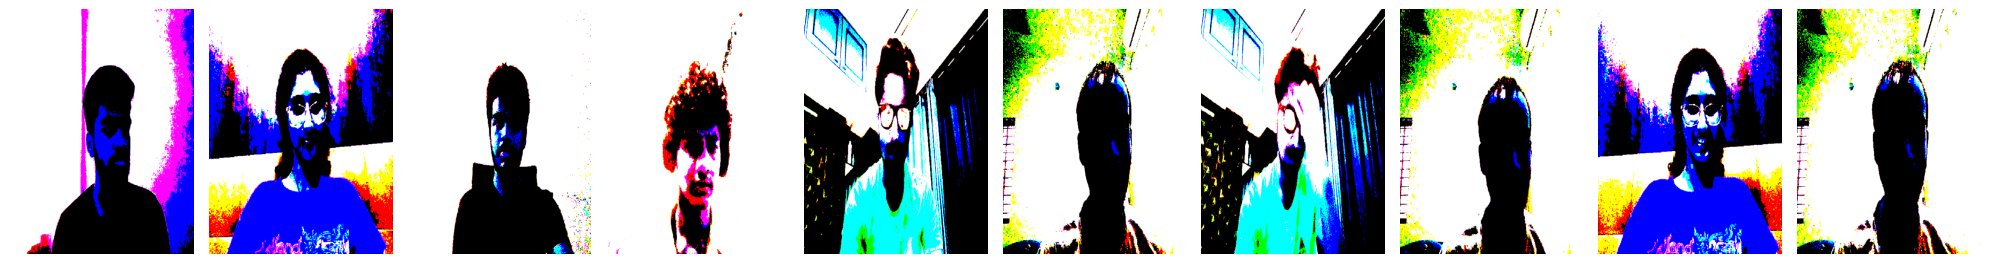

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [11]:
model = Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(640, 480, 3)), MaxPool2D(pool_size=(2,2), strides=2),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
  MaxPool2D(pool_size=(2,2), strides=2),
  Flatten(),
  Dense(units=30, activation='relu'),
  MaxPool2D(pool_size=(2,2), strides=2),
  Dense(units=12, activation='relu'),
  Dense(units=len(name_of_people), activation='softmax')
])

In [10]:
# model.add(tf.keras.layers.Dense(len(name_of_people), activation='softmax'))

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# model.fit(x=train_batches, epochs=10, verbose=2)
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
30/30 - 28s - loss: 237.3417 - accuracy: 0.5268 - val_loss: 5.1396 - val_accuracy: 0.6400 - 28s/epoch - 932ms/step
Epoch 2/10
30/30 - 28s - loss: 0.7920 - accuracy: 0.7483 - val_loss: 0.3872 - val_accuracy: 0.7467 - 28s/epoch - 923ms/step
Epoch 3/10
30/30 - 28s - loss: 0.3713 - accuracy: 0.7685 - val_loss: 0.3269 - val_accuracy: 0.7933 - 28s/epoch - 946ms/step
Epoch 4/10
30/30 - 28s - loss: 0.3434 - accuracy: 0.7819 - val_loss: 0.2548 - val_accuracy: 0.8467 - 28s/epoch - 928ms/step
Epoch 5/10
30/30 - 28s - loss: 0.2849 - accuracy: 0.8221 - val_loss: 0.2013 - val_accuracy: 0.8667 - 28s/epoch - 928ms/step
Epoch 6/10
30/30 - 28s - loss: 0.2079 - accuracy: 0.8591 - val_loss: 0.1643 - val_accuracy: 0.8667 - 28s/epoch - 926ms/step
Epoch 7/10
30/30 - 28s - loss: 0.1756 - accuracy: 0.8624 - val_loss: 0.1303 - val_accuracy: 0.8667 - 28s/epoch - 928ms/step
Epoch 8/10
30/30 - 28s - loss: 0.1257 - accuracy: 0.9430 - val_loss: 0.0982 - val_accuracy: 1.0000 - 28s/epoch - 923ms/step
Epoch 

TESTING THE MODEL

In [45]:
test_batches = ImageDataGenerator( preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=test_path, target_size=(640, 480), classes=name_of_people, batch_size=10, shuffle=False)

Found 13 images belonging to 8 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

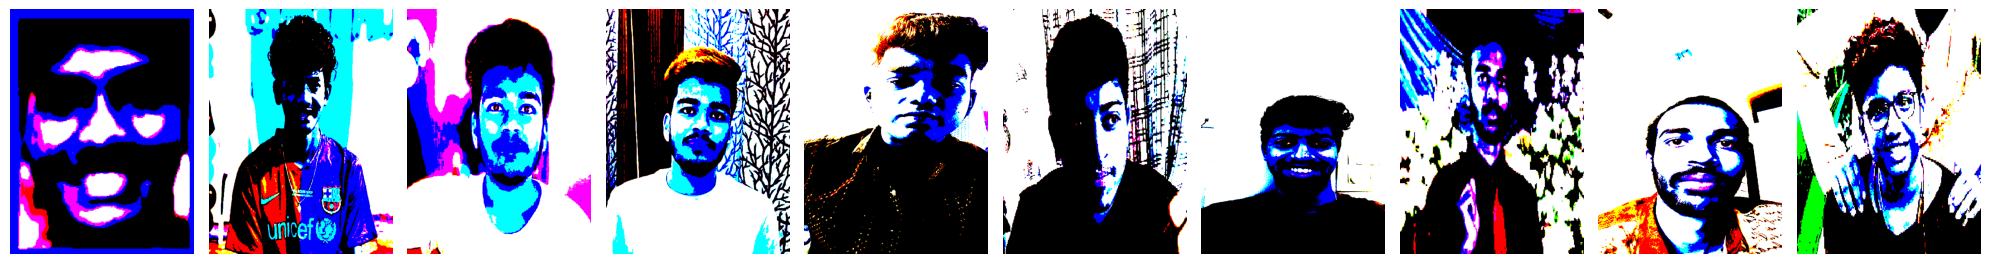

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


In [46]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [47]:
predictions = model.predict(x=test_batches, verbose=0)

In [48]:
np.round(predictions)

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [50]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without normalization")

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

In [51]:
test_batches.class_indices

{'amey': 0,
 'sandesh': 1,
 'vailantan': 2,
 'nathan': 3,
 'shoydon': 4,
 'vedant': 5,
 'manasvi': 6,
 'srijita': 7}

Confusion Matrix, without normalization
[[0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0]
 [2 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0]
 [1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]]


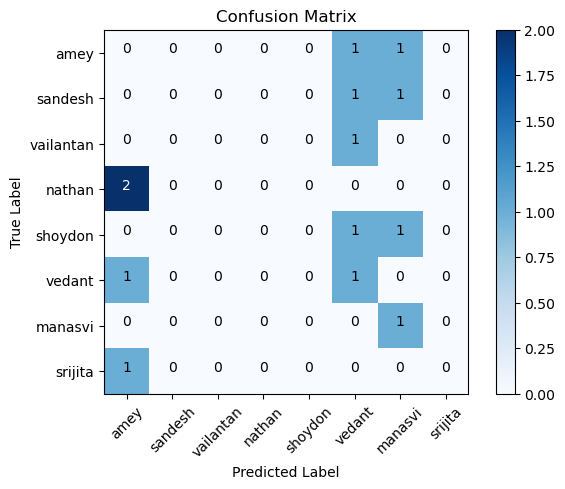

In [52]:
cm_plot_labels = name_of_people
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [55]:
model.save('model/facerecognition')

INFO:tensorflow:Assets written to: model/facerecognition/assets


INFO:tensorflow:Assets written to: model/facerecognition/assets


In [56]:
newModel = keras.models.load_model('model/facerecognition/')

In [57]:
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 640, 480, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 320, 240, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 320, 240, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 160, 120, 64)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1228800)           0         
                                                                 
 dense_4 (Dense)             (None, 30)               